### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [24]:
data = pd.read_csv('coupons.csv')

In [61]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [202]:
df = data
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [214]:
df.info()
 

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passanger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null    obj

In [117]:
print("\nDuplicate rows:", df.duplicated().sum())
df_cleaned = df.drop_duplicates()




Duplicate rows: 0


In [212]:
df = df.dropna()
df = df.dropna(axis=1)


4. What proportion of the total observations chose to accept the coupon?



In [121]:
print(df["coupon"].value_counts())

coupon
Coffee House             37
Restaurant(<20)          25
Carry out & Take away    19
Restaurant(20-50)        14
Bar                      13
Name: count, dtype: int64


5. Use a bar plot to visualize the `coupon` column.

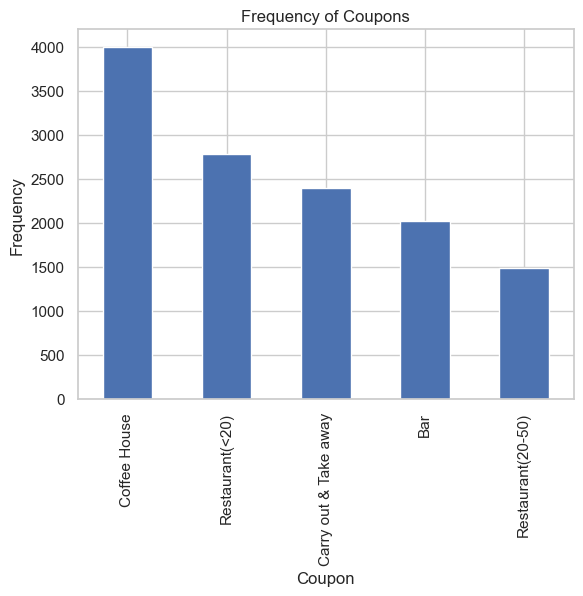

In [149]:
 import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('coupons.csv')


coupon_counts = df['coupon'].value_counts()

 
plt.figure()  # Create a new figure
coupon_counts.plot(kind='bar')


plt.xlabel('Coupon')
plt.ylabel('Frequency')
plt.title('Frequency of Coupons')

plt.show()

# Assistant
This is a syntax error because the boolean condition in the DataFrame filter is incomplete. You need to complete the comparison operation after "bar". Based on the comment, it seems you want to filter for people who visit bars 3 or fewer times.

Would you like me to provide the corrected code?

The error occurs because:
1. The square bracket filtering operation is not complete
2. There's no comparison operator (like <, >, ==, etc.)
3. There's no comparison value

6. Use a histogram to visualize the temperature column.

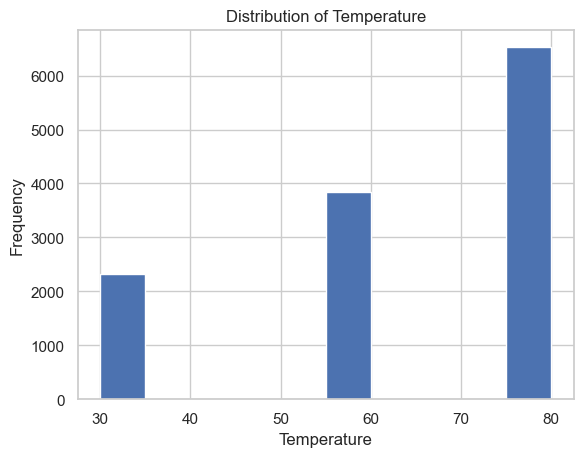

In [151]:
 df = pd.read_csv('coupons.csv')

# Plot a histogram of the temperature column
plt.figure()
df['temperature'].hist()

# Label the axes and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [155]:
import pandas as pd

 
df = pd.read_csv('coupons.csv')

 
bar_df = df[df['coupon'] == 'Bar']

print(bar_df.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [157]:
 import pandas as pd

df = pd.read_csv('coupons.csv')


bar_df = df[df['coupon'] == 'Bar']


proportion_accepted = bar_df['Y'].mean()

print(f"Proportion of Bar coupons accepted: {proportion_accepted:.2f}")

Proportion of Bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [169]:
import pandas as pd


df = pd.read_csv('coupons.csv')


print("Unique values in 'Bar' column:", df['Bar'].unique())


mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}


df['Bar_num'] = df['Bar'].map(mapping)


bar_df = df[df['coupon'] == 'Bar']


few_visits = bar_df[bar_df['Bar_num'] <= 3]


many_visits = bar_df[bar_df['Bar_num'] > 3]


acceptance_few = few_visits['Y'].mean()
acceptance_many = many_visits['Y'].mean()

 
print(f"Acceptance rate (3 or fewer visits/month): {acceptance_few:.2f}")
print(f"Acceptance rate (more than 3 visits/month): {acceptance_many:.2f}")



Unique values in 'Bar' column: ['never' 'less1' '1~3' 'gt8' nan '4~8']
Acceptance rate (3 or fewer visits/month): 0.37
Acceptance rate (more than 3 visits/month): 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [173]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('coupons.csv')

# Check what the Bar and age columns look like:
print("Unique values in 'Bar':", df['Bar'].unique())
print("Unique values in 'age':", df['age'].unique())

# Map the categorical strings to numeric (adjust if needed)
bar_mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}
age_mapping = {
    'below21': 20,
    '21': 21,
    '26-30': 28,
    '31-40': 35,
    '41-50': 45,
    '50plus': 55
}

df['Bar_num'] = df['Bar'].map(bar_mapping)
df['Age_num'] = df['age'].map(age_mapping)

# Group A: Drivers who go to a bar more than once per month & are over 25
group_a = df[(df['Bar_num'] > 1) & (df['Age_num'] > 25)]

# Group B: All other drivers
group_b = df[~((df['Bar_num'] > 1) & (df['Age_num'] > 25))]

# Compute acceptance rates (assuming 'Y' = 1 if coupon accepted, 0 if not)
acceptance_a = group_a['Y'].mean()
acceptance_b = group_b['Y'].mean()

print(f"Acceptance rate (Bar > 1/month, Age > 25): {acceptance_a:.2f}")
print(f"Acceptance rate (All others): {acceptance_b:.2f}")


Unique values in 'Bar': ['never' 'less1' '1~3' 'gt8' nan '4~8']
Unique values in 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Acceptance rate (Bar > 1/month, Age > 25): 0.60
Acceptance rate (All others): 0.57


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [216]:

 import pandas as pd

# Read your data
df = pd.read_csv('coupons.csv')


bar_mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}
df['Bar_num'] = df['Bar'].map(bar_mapping)

# Define Group A: meets all three criteria
group_a = df[
    (df['Bar_num'] > 1) &
    (df['passanger'] != 'Kid(s)') &
    (df['occupation'] != 'Farming/Fishing')
]

# Define Group B: all other drivers
group_b = df[~(
    (df['Bar_num'] > 1) &
    (df['passanger'] != 'Kid(s)') &
    (df['occupation'] != 'Farming/Fishing')
)]

# Assuming 'Y' = 1 for accepted, 0 for not accepted
acceptance_a = group_a['Y'].mean()
acceptance_b = group_b['Y'].mean()

print(f"Acceptance rate (Group A): {acceptance_a:.2f}")
print(f"Acceptance rate (Group B): {acceptance_b:.2f}")


Acceptance rate (Group A): 0.62
Acceptance rate (Group B): 0.55


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [230]:
import pandas as pd

df = pd.read_csv("coupons.csv")

# (Optional) Map columns to numeric if needed
bar_mapping = {'never':0, 'less1':0.5, '1~3':2, '4~8':6, 'gt8':9}
df['Bar_num'] = df['Bar'].map(bar_mapping)

age_mapping = {'below21':20, '21':21, '26-30':28, '31-40':35, '41-50':45, '50plus':55}
df['Age_num'] = df['age'].map(age_mapping)

restaurant20_mapping = {'never':0, 'less1':0.5, '1~3':2, '4~8':6, 'gt8':9}
df['RestaurantLessThan20_num'] = df['RestaurantLessThan20'].map(restaurant20_mapping)

income_mapping = {
    'Less than $12500':12.5,
    '$12500 - $24999':18.7,
    '$25000 - $37499':31.2,
    '$37500 - $49999':43.7,
    '$50000 - $62499':56.2,
    '$62500 - $74999':68.7,
    '$75000 - $87499':81.2,
    '$87500 - $99999':93.7,
    '$100000 or more':100
}
df['Income_num'] = df['income'].map(income_mapping)

# Define each condition
condA = (
    (df['Bar_num'] > 1) &
    (df['passanger'] != 'Kid(s)') &  
    (df['maritalStatus'] != 'Widowed')
)
condB = (
    (df['Bar_num'] > 1) &
    (df['Age_num'] < 30)
)
condC = (
    (df['RestaurantLessThan20_num'] > 4) &
    (df['Income_num'] < 50)
)

# Combine conditions with OR
groupA_filter = condA | condB | condC

# Split into Group A and Group B
groupA = df[groupA_filter]
groupB = df[~groupA_filter]

# Calculate acceptance rates
acceptance_A = groupA['Y'].mean()
acceptance_B = groupB['Y'].mean()

print(f"Acceptance rate (Group A): {acceptance_A:.2f}")
print(f"Acceptance rate (Group B): {acceptance_B:.2f}")


Acceptance rate (Group A): 0.60
Acceptance rate (Group B): 0.54


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
drivers who already intergrate social drinlking into there nightlife tend to accept to accept more.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [236]:
import pandas as pd

df = pd.read_csv("coupons.csv")


coffee_df = df[df['coupon'] == 'Coffee House']
print(df['coupon'].unique())


['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [238]:
 coffee_accept_rate = coffee_df['Y'].mean()
print(f"Overall acceptance rate for Coffee House coupons: {coffee_accept_rate:.2f}")


Overall acceptance rate for Coffee House coupons: 0.50


In [240]:
 print("Unique passenger categories:", coffee_df['passanger'].unique())

 accept_by_passenger = coffee_df.groupby('passanger')['Y'].mean()
print("Acceptance rates by passenger type:\n", accept_by_passenger)


Unique passenger categories: ['Friend(s)' 'Kid(s)' 'Alone' 'Partner']
Acceptance rates by passenger type:
 passanger
Alone        0.437943
Friend(s)    0.596906
Kid(s)       0.483092
Partner      0.570492
Name: Y, dtype: float64


In [242]:
accept_by_occupation = coffee_df.groupby('occupation')['Y'].mean().sort_values(ascending=False)
print("Acceptance rates by occupation (Coffee House):\n", accept_by_occupation)


Acceptance rates by occupation (Coffee House):
 occupation
Healthcare Practitioners & Technical         0.743243
Building & Grounds Cleaning & Maintenance    0.727273
Student                                      0.625251
Transportation & Material Moving             0.618421
Healthcare Support                           0.615385
Installation Maintenance & Repair            0.568182
Architecture & Engineering                   0.555556
Farming Fishing & Forestry                   0.545455
Unemployed                                   0.542105
Arts Design Entertainment Sports & Media     0.507177
Computer & Mathematical                      0.503341
Personal Care & Service                      0.500000
Business & Financial                         0.479452
Construction & Extraction                    0.478261
Life Physical Social Science                 0.475410
Management                                   0.456376
Protective Service                           0.448276
Food Preparation & Serv

In [244]:

accept_by_age = coffee_df.groupby('age')['Y'].mean().sort_values(ascending=False)
print("Acceptance rates by age (Coffee House):\n", accept_by_age)


Acceptance rates by age (Coffee House):
 age
below21    0.696774
21         0.524349
26         0.514828
46         0.513636
41         0.501538
31         0.476726
36         0.467662
50plus     0.420183
Name: Y, dtype: float64


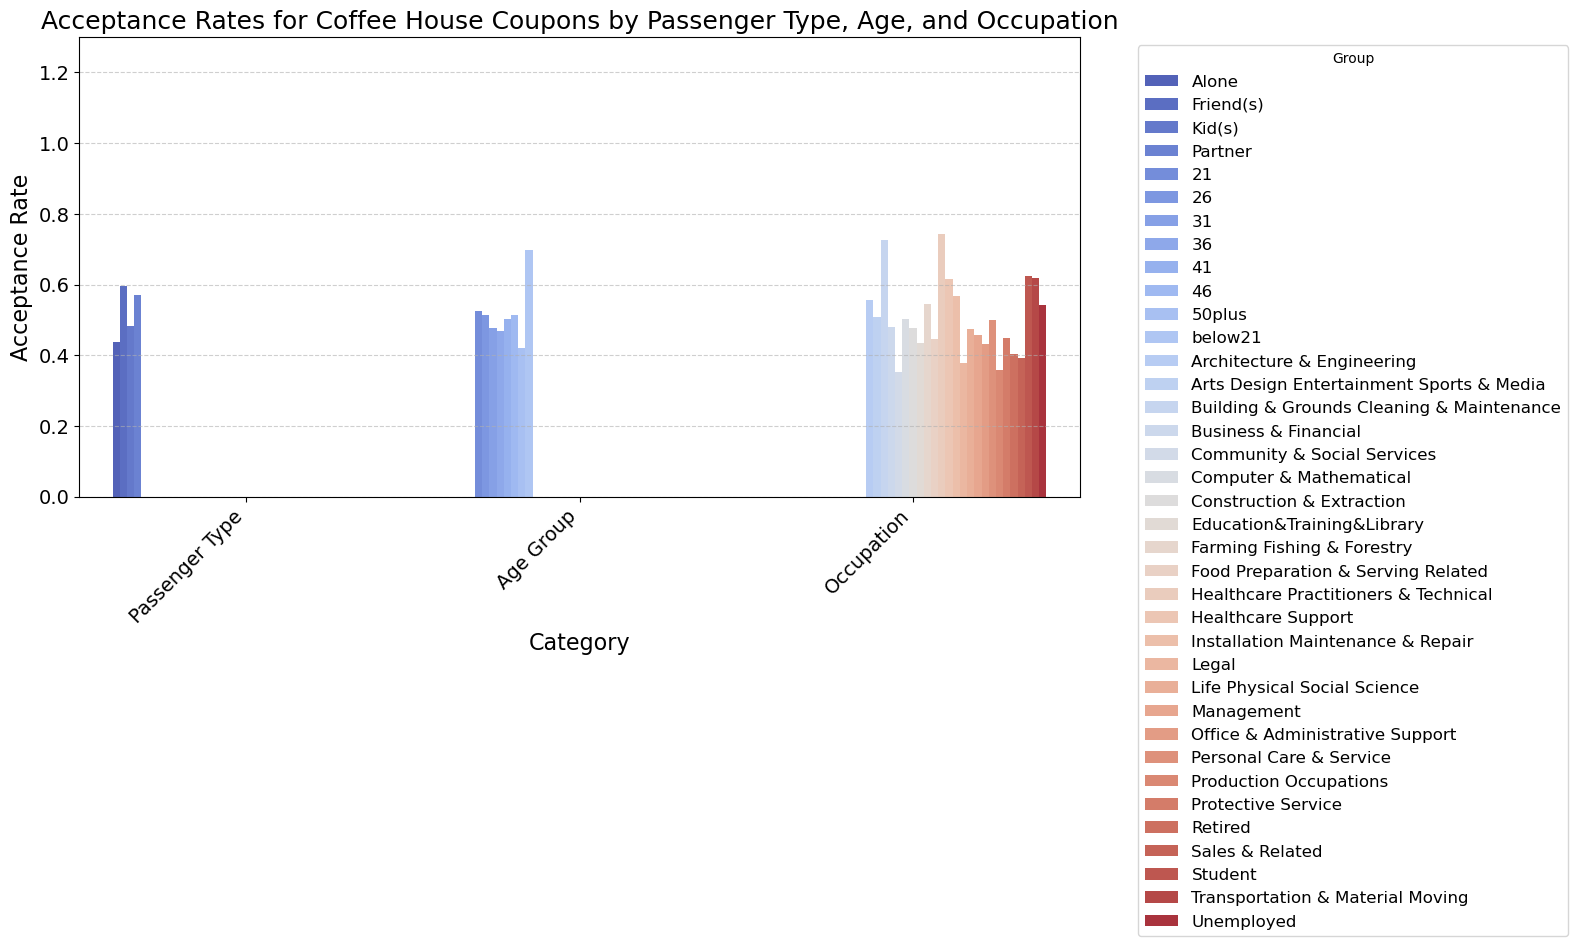

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger bar chart for acceptance rates by Passenger Type, Age, and Occupation
plt.figure(figsize=(16, 8))  # Increased figure size for better visibility

# Create a bar plot without extra x-axis space
sns.barplot(data=acceptance_data, x="Category", y="Acceptance Rate", hue="Group", palette="coolwarm")

# Labels and title
plt.xlabel("Category", fontsize=16)
plt.ylabel("Acceptance Rate", fontsize=16)
plt.title("Acceptance Rates for Coffee House Coupons by Passenger Type, Age, and Occupation", fontsize=18)
plt.xticks(rotation=45, fontsize=14, ha="right")  # Rotate and align labels properly
plt.yticks(fontsize=14)
plt.legend(title="Group", fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

# Extend the y-axis for better visibility
plt.ylim(0, 1.3)  # Adjusted to make the y-axis longer
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()






